In [0]:
#!ps ax | grep python
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import time
import os
import copy
import numpy as np

In [2]:
#@title Import PyTorch modules if they are not present
!pip3 install torch torchvision
!pip3 install tqdm
!git clone https://github.com/kswamy15/dlnerds
#!rm -r dlnerds

fatal: destination path 'dlnerds' already exists and is not an empty directory.


In [3]:
!pip install kaggle

  Running setup.py bdist_wheel for kaggle ... - \ done
  Stored in directory: /content/.cache/pip/wheels/98/be/57/a576a1f2f50f5c3bebd0c08fc3b2a6881dfde31c8217014978
Successfully built kaggle


In [4]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
   print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 64 bytes


In [0]:
mkdir /content/.kaggle

In [0]:
cp kaggle.json /content/.kaggle/

In [7]:
!kaggle competitions files -c dog-breed-identification

name                        size  creationDate         
-------------------------  -----  -------------------  
labels.csv.zip             214KB  2017-09-28 20:49:39  
sample_submission.csv.zip  281KB  2017-09-28 20:49:39  
test.zip                   346MB  2017-09-28 20:50:18  
train.zip                  345MB  2017-09-28 20:50:19  


In [17]:
!kaggle competitions download -c dog-breed-identification -f labels.csv.zip -p $HOME/dog-breed

labels.csv.zip: Downloaded 214KB of 214KB


In [18]:
!kaggle competitions download -c dog-breed-identification -f train.zip -p $HOME/dog-breed

train.zip: Downloaded 345MB of 345MB


In [19]:
!unzip $HOME/dog-breed/labels.csv.zip  -d data

Archive:  /content/dog-breed/labels.csv.zip
  inflating: data/labels.csv         


In [20]:
!unzip $HOME/dog-breed/train.zip  -d data

Archive:  /content/dog-breed/train.zip
   creating: data/train/
  inflating: data/train/000bec180eb18c7604dcecc8fe0dba07.jpg  
  inflating: data/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg  
  inflating: data/train/001cdf01b096e06d78e9e5112d419397.jpg  
  inflating: data/train/00214f311d5d2247d5dfe4fe24b2303d.jpg  
  inflating: data/train/0021f9ceb3235effd7fcde7f7538ed62.jpg  
  inflating: data/train/002211c81b498ef88e1b40b9abf84e1d.jpg  
  inflating: data/train/00290d3e1fdd27226ba27a8ce248ce85.jpg  
  inflating: data/train/002a283a315af96eaea0e28e7163b21b.jpg  
  inflating: data/train/003df8b8a8b05244b1d920bb6cf451f9.jpg  
  inflating: data/train/0042188c895a2f14ef64a918ed9c7b64.jpg  
  inflating: data/train/004396df1acd0f1247b740ca2b14616e.jpg  
  inflating: data/train/0067dc3eab0b3c3ef0439477624d85d6.jpg  
  inflating: data/train/00693b8bc2470375cc744a6391d397ec.jpg  
  inflating: data/train/006cc3ddb9dc1bd827479569fcdc52dc.jpg  
  inflating: data/train/0075dc49dab4024d12fafe67074d8a


  inflating: data/train/0c286c574ef09562c123dafe5ce6ac23.jpg  
  inflating: data/train/0c2fdeb77e6e650e69ecca013c7e8e67.jpg  
  inflating: data/train/0c329020d6ca0ae5af30f6857ac7e86c.jpg  
  inflating: data/train/0c36c19e7c4e932b8e0c01aa845b2fce.jpg  
  inflating: data/train/0c378307f600ba007a7eaa50fba6d0b8.jpg  
  inflating: data/train/0c3b282ecbed1ca9eb17de4cb1b6e326.jpg  
  inflating: data/train/0c4ac597d196aaf07f3af039b8fd6925.jpg  
  inflating: data/train/0c64a816fcd8aa13dbd4e874307bad51.jpg  
  inflating: data/train/0c68a578981993b919e89c611f04a97f.jpg  
  inflating: data/train/0c71084d955bfca989d865cbcf8cf8ae.jpg  
  inflating: data/train/0c71338af3f3a8c068ec28b5f6b8f8ae.jpg  
  inflating: data/train/0c8fe33bd89646b678f6b2891df8a1c6.jpg  
  inflating: data/train/0c9bac77cd53f1c6756c7581e9b0bd00.jpg  
  inflating: data/train/0c9fc0f58a6724ca680c76785a452bba.jpg  
  inflating: data/train/0ca382d7309e346ac802a202d0fa8c67.jpg  
  inflating: data/train/0ca9280205bd68d201e1d708db3f20


  inflating: data/train/1ad2abdf8ee8ab02193bb0102ec66342.jpg  
  inflating: data/train/1ad4c64d20aac8176f0136122754344c.jpg  
  inflating: data/train/1ad61e0aa827fe8f39e5592523ded6d7.jpg  
  inflating: data/train/1ad70c17e5e38db454ec75b711ce73ad.jpg  
  inflating: data/train/1ad9c8713583e136c1c9884a26a8de10.jpg  
  inflating: data/train/1adf573efd5f90c4b11be12afbf66e3d.jpg  
  inflating: data/train/1ae80c7e781d72681bc8e582a703919d.jpg  
  inflating: data/train/1ae8f1675d619a2414a2c67f6cceed76.jpg  
  inflating: data/train/1af14f734087da9b1405f8f02a4374b1.jpg  
  inflating: data/train/1af97b8477a0d9533985feb33aa704d8.jpg  
  inflating: data/train/1b05bf1d2965886fd12bb67f921fe222.jpg  
  inflating: data/train/1b20097c91be4734961d8e865e414d7e.jpg  
  inflating: data/train/1b23140bf99ab3a7a82ddefc64dff361.jpg  
  inflating: data/train/1b26fc0e227488f288c753c84a88ca6c.jpg  
  inflating: data/train/1b288bf18ec66fa70a3eb5d8552bec2b.jpg  
  inflating: data/train/1b2ad6fc60a6c5238d9e0a5863d310


  inflating: data/train/29f4fbc88dbe90a21ceffa17cd167be0.jpg  
  inflating: data/train/29f5f80f17ffc3a4662468b13057bf08.jpg  
  inflating: data/train/29ffe86d2ec850780e4cbe1539290752.jpg  
  inflating: data/train/2a058ce4bb6189960e142d2ee9115ca8.jpg  
  inflating: data/train/2a114941065b77b8d5d0c19b9256ecc6.jpg  
  inflating: data/train/2a14962a7a0d1461f5b5623fb3d76884.jpg  
  inflating: data/train/2a15ca0aff3a7a9ecd961460c5f20ba5.jpg  
  inflating: data/train/2a21a6ca07560ad9cbda9d17cf975b1a.jpg  
  inflating: data/train/2a26dd719f6ab87fc13eb834d9a9f8e6.jpg  
  inflating: data/train/2a290eb7b2cf9dd735935388c5ffa6f1.jpg  
  inflating: data/train/2a325864fcc3e8672071f91d08c22467.jpg  
  inflating: data/train/2a341a9eb623d1ad095a94a4c2b420fa.jpg  
  inflating: data/train/2a38b087dcb10edfa2b4aecc882419ab.jpg  
  inflating: data/train/2a3b3a4fecb3171df19bed491865c733.jpg  
  inflating: data/train/2a4343b91dc55997f868b310f58a542f.jpg  
  inflating: data/train/2a4e50e444cedaf3c425d16f06a8d6


  inflating: data/train/38c5b9c06dd0345604cb1a818ccc37e3.jpg  
  inflating: data/train/38cecbfe51467a21d5b72eb58efafab0.jpg  
  inflating: data/train/38d2daf4881ec2e5860e91fe57d42bf3.jpg  
  inflating: data/train/38d35ebad2ded36e23d24b39d9be2297.jpg  
  inflating: data/train/38d6bc0651588a0a04480b918934a8f6.jpg  
  inflating: data/train/38da992c0b9fbcac4127a80fc70708fd.jpg  
  inflating: data/train/38df8edb78febdb8f23253238cce0ba9.jpg  
  inflating: data/train/38e4bc2c69d8e5a3abd387f3707d86de.jpg  
  inflating: data/train/38e9c2d8f4f1a26685e80adf8f1b927c.jpg  
  inflating: data/train/38ecebe27257f12dd04dbcdd19b2dad3.jpg  
  inflating: data/train/38ef9e4d9065f4d8a7efd44d0f83ef08.jpg  
  inflating: data/train/390c0430ed5d9f8a4e1ad583ad4425e1.jpg  
  inflating: data/train/390e3553bc9a78a516417aba1fc27cbc.jpg  
  inflating: data/train/39100e5819539a8b3418e907fa51426d.jpg  
  inflating: data/train/3915c90aa4d23a5562accab744902269.jpg  
  inflating: data/train/3921fb28e2fae3bea5f85db5c84df8


  inflating: data/train/472b373809fe51b17f1d1f4ea65f2700.jpg  
  inflating: data/train/4731255ed645b22e2cf13c20c9ce7520.jpg  
  inflating: data/train/4743441fb7a68403c3390e92c6fa745d.jpg  
  inflating: data/train/474a63cd6bd1e670841655cf3fa78d43.jpg  
  inflating: data/train/475171ec5847e4df41847e295b8cfca2.jpg  
  inflating: data/train/4760441bf734319f25dd9cc746f99254.jpg  
  inflating: data/train/47626b3b6324182b526e28ee88361047.jpg  
  inflating: data/train/4763da38c6e6e72c2e972dde45fda84e.jpg  
  inflating: data/train/47707f0dc167f1740dd4c4a8b10ba814.jpg  
  inflating: data/train/4786ca40de4d33cfebda53968ca10ed4.jpg  
  inflating: data/train/4787bd73d7c56305db4f23e7dddf7b96.jpg  
  inflating: data/train/478c1ceb68afd4e6be917ea8367a71bd.jpg  
  inflating: data/train/478d54ecf957b06bb738544e8828d62e.jpg  
  inflating: data/train/478eba9f4c975750e6efd7b3c7350ade.jpg  
  inflating: data/train/478f36c489b36e2f4ba5667685c4baa9.jpg  
  inflating: data/train/478faa4d28d22cb844d417ca59a0e7


  inflating: data/train/57613fae3f9485c50a2331b4db6582cc.jpg  
  inflating: data/train/576697bcf5b920ffc43bacc427043e59.jpg  
  inflating: data/train/576b566b73d9cae4190e17d891d51e16.jpg  
  inflating: data/train/5770d8cd6e141c819501cd0fad15151b.jpg  
  inflating: data/train/57792e09ee1d252ec969b504cc309729.jpg  
  inflating: data/train/5779e9d1de839010474af1df2b980806.jpg  
  inflating: data/train/5783b64ce4c041c603e436f27e9c7e4c.jpg  
  inflating: data/train/578ab55f94b2cd1bce0529552f5026bb.jpg  
  inflating: data/train/578fed8e31c96406eaa447ae3ff604ba.jpg  
  inflating: data/train/57926baaefa51fe0de7e2641edb0d644.jpg  
  inflating: data/train/57942abef42726bb588e90abb5a6c6df.jpg  
  inflating: data/train/579bdeaca5d3995be8383d74e48072ed.jpg  
  inflating: data/train/57a12c8dcfb907f389dfa244f2987004.jpg  
  inflating: data/train/57a765607238aa2fb8aa3ca4da6af041.jpg  
  inflating: data/train/57b423fb3fbdf8d7aae4dfe8b4c8daf7.jpg  
  inflating: data/train/57b6db1ec82c01676e11d621f9e15c


  inflating: data/train/6366e33e378df764b143dbae6809b756.jpg  
  inflating: data/train/63696c0486f6ec3eb1395ecb7288bb15.jpg  
  inflating: data/train/6369e971e2913e63c674ad94393aedda.jpg  
  inflating: data/train/636aa6a1709f0a15664ce15d0fb70128.jpg  
  inflating: data/train/6377bbada02c051ff2a7f17c5fb956d5.jpg  
  inflating: data/train/63a23dacecac1bc1bdb3faf77291220a.jpg  
  inflating: data/train/63aa22cfbcdf6637ce75d8bfd16f4dc7.jpg  
  inflating: data/train/63c2fe18c2d62be4cc89e56b36cf9879.jpg  
  inflating: data/train/63d1b332f937aa0de02a3d714c31fd8b.jpg  
  inflating: data/train/63d24a9c95580f65f56f0d13ff4fe829.jpg  
  inflating: data/train/63d413f73e1e8de516fce933245277d7.jpg  
  inflating: data/train/63dd3e15f7fe4b3b3e9a69530e8d36b3.jpg  
  inflating: data/train/63e090e41e4855170f3cb8173d164529.jpg  
  inflating: data/train/63efa5f25bfaffdad154c8ac66d898a6.jpg  
  inflating: data/train/63fec13ea3eaa16965a4a641fc27b7cf.jpg  
  inflating: data/train/64051f48863887c4f01f0cae1712cd


  inflating: data/train/727f8fa18a8668406448e9b00c52c671.jpg  
  inflating: data/train/7282ffdad57a376830a279865a0eb487.jpg  
  inflating: data/train/728b6f85d37f74e5f5c4a477103da84f.jpg  
  inflating: data/train/729ed4ed4ad5e2599ce8a769b84a4c08.jpg  
  inflating: data/train/72a0a277c774fdac2a7e0e359b059d81.jpg  
  inflating: data/train/72a718aa575dba137f8c54c69896acdf.jpg  
  inflating: data/train/72b686a08819ef2fbd4c01e96290de7c.jpg  
  inflating: data/train/72bfa0dc2020f6a54a2b11293160a079.jpg  
  inflating: data/train/72c99ca86c7f12d597a97777e28c5bc2.jpg  
  inflating: data/train/72cd5b0c4da39b4499cf34f2c7a94f99.jpg  
  inflating: data/train/72e86c8e5f7dffffec58f56cfa9be82d.jpg  
  inflating: data/train/72ef6af03c9603ce6ae39475861fdd64.jpg  
  inflating: data/train/72f267675c4be6b4f81142b145261457.jpg  
  inflating: data/train/7307fb8fb51c7317e12aa86a021fddb1.jpg  
  inflating: data/train/7309638ce928e5cfb1585395b9c0da79.jpg  
  inflating: data/train/730ae835633470f2c55eee0a61179a


  inflating: data/train/7eb8e0dc4979191dfde33914510b089e.jpg  
  inflating: data/train/7eba9daec453bb9dea012c33709a21f0.jpg  
  inflating: data/train/7ec41ad6eaf26f9cb5d0c61b4a4d3705.jpg  
  inflating: data/train/7ecd9ea72881883e8a0c708425cb9b2b.jpg  
  inflating: data/train/7ed106262a4f7cb3e02c35c3e1738eec.jpg  
  inflating: data/train/7edf7c9919f285b66adbe07212709a84.jpg  
  inflating: data/train/7eef63f380bd2c73b73e0f17d3420dff.jpg  
  inflating: data/train/7eef6dae80d04d0605fa44f0e218b116.jpg  
  inflating: data/train/7efa3e0f614bb18b9ec8c18d5de0d5a9.jpg  
  inflating: data/train/7f05b953cc5734f48977eb82baaa3ed6.jpg  
  inflating: data/train/7f144c90c01badf0d5495881bc56429b.jpg  
  inflating: data/train/7f1565acc56c48145f96b09aa2779830.jpg  
  inflating: data/train/7f1746ba7ed8254df3be3c2a1ab97e56.jpg  
  inflating: data/train/7f2022deb1acfa0ae78005a9cde576ed.jpg  
  inflating: data/train/7f3e919b6cb9ed863c08091e2e863cf3.jpg  
  inflating: data/train/7f43f309e6e7110b37259d6a2ccd70


  inflating: data/train/89cbfc8c3745a9c14c2b73765f30fc9a.jpg  
  inflating: data/train/89d2d5852bccf43f7cc15cc1cf7ee5d7.jpg  
  inflating: data/train/89e04e8b173e1bd50911a94ddd6f1dd9.jpg  
  inflating: data/train/89e486c54ca7c2537abe3522142a3537.jpg  
  inflating: data/train/89e653251ebdb4125224d3af5230587e.jpg  
  inflating: data/train/89f1b9d773cca9a3adbf536a62947262.jpg  
  inflating: data/train/89f38923a2427b596553c4382841a640.jpg  
  inflating: data/train/89f6482c56119d9031029346746fc17a.jpg  
  inflating: data/train/8a066dcad24606cf4a5e1ada81093989.jpg  
  inflating: data/train/8a0717f2adf56db70bf360f6464f29b6.jpg  
  inflating: data/train/8a1129e4fd587efdc8ef8c8cc08664e4.jpg  
  inflating: data/train/8a16b61df5b24c926d2e79267a0d62e6.jpg  
  inflating: data/train/8a1b3f9f3ff9fef70962ac68704e629a.jpg  
  inflating: data/train/8a1c01869f6354dc1e4f237db70ef7be.jpg  
  inflating: data/train/8a248f8b155f9a7f65ac7a5c9090cc5a.jpg  
  inflating: data/train/8a2519eb2577ce76ccedd4283f4435


  inflating: data/train/9606853b9f54adf4537c061d7c9023ad.jpg  
  inflating: data/train/96139f25790911cf399af1aef2e81b6c.jpg  
  inflating: data/train/961aab1d30044142287d7ce30c45b65b.jpg  
  inflating: data/train/96269bea463a7b189a636ef082c4e324.jpg  
  inflating: data/train/9629f46ec0bd1eae63121877c7d6787e.jpg  
  inflating: data/train/962c60cd9ad2e083547caa891ca0d466.jpg  
  inflating: data/train/96304329e537c8202c65e246198559a9.jpg  
  inflating: data/train/96332d61312a248ebe3a3007090000d5.jpg  
  inflating: data/train/96484b44c4a40f180bfb4333fe16fae5.jpg  
  inflating: data/train/96502473e0aa30557885892ed8a3e1aa.jpg  
  inflating: data/train/9653df0f5da50d6d0c1f71f356ada7f3.jpg  
  inflating: data/train/9653fe4984785611b21b367cdaa6e050.jpg  
  inflating: data/train/965565e9bb4647b962f56d128a81c37f.jpg  
  inflating: data/train/965ab0fa7629ecac86f1ebc2623fbedd.jpg  
  inflating: data/train/965ec39e068162e6dc15618377e01571.jpg  
  inflating: data/train/965f39ec77e59f042714aed7ea826b

  inflating: data/train/a290e911f2c3fe117944ef7e0b42cb03.jpg  
  inflating: data/train/a293948f43c84eeb43055bc78ecfdc5d.jpg  
  inflating: data/train/a2974cd29095193d21bad9d4429a0146.jpg  
  inflating: data/train/a29b6e5dc3618aa9ed97ed75ba73e5a0.jpg  
  inflating: data/train/a2a210e72f5c6c1ff5a9bcf5fe9442e7.jpg  
  inflating: data/train/a2abeac260a7efb447af530cf5ce70c9.jpg  
  inflating: data/train/a2ac195c257b97664fcafbe23b060205.jpg  
  inflating: data/train/a2b19aba1a7dd25dca3437cc2bd769e6.jpg  
  inflating: data/train/a2b9bd0ee3360ec1a174daf76f385d21.jpg  
  inflating: data/train/a2bd873b70daa34386f0d9dea9a8ecd8.jpg  
  inflating: data/train/a2be9ffea5e79e2e1d5d9bc50523dc8a.jpg  
  inflating: data/train/a2c45749d89597425da581670dde0160.jpg  
  inflating: data/train/a2c5cd0d85ebbd6679bd8320d90ecfba.jpg  
  inflating: data/train/a2cf649e9d08ee2289ca1dd90e089cc3.jpg  
  inflating: data/train/a2d1737311988806e991f908de9fb088.jpg  
  inflating: data/train/a2d67239a3ca734a0d30fecf7047e64


  inflating: data/train/add47db070492c3ed9d3b76f1886d684.jpg  
  inflating: data/train/addf2f5e7426173ffb795fa485edae63.jpg  
  inflating: data/train/ade0242e0bfe15d202e398c2380efb3c.jpg  
  inflating: data/train/adeb01e891e95b347ea3132451fab8ec.jpg  
  inflating: data/train/adede2c5e311633f1b6d6b3109c733db.jpg  
  inflating: data/train/adf50131b2c975bc32fdf57194fc3cff.jpg  
  inflating: data/train/adfe10ae8d4b90ba0abb56a0648dac8e.jpg  
  inflating: data/train/ae041dda85d54e44e581ab76f536208a.jpg  
  inflating: data/train/ae0aa7d59b4d311e57fd7fc47ba65c4b.jpg  
  inflating: data/train/ae0cf4a8076e52a04632de2b8e9a911b.jpg  
  inflating: data/train/ae160437df0d4def173e66c76bb2ab56.jpg  
  inflating: data/train/ae162648a4b30714dca7d86364237c63.jpg  
  inflating: data/train/ae16b7a7f905244eba139f90f48d3171.jpg  
  inflating: data/train/ae1a8d64cea83e9f1bda35351d2174d7.jpg  
  inflating: data/train/ae1aeb3bb01b156aad5db0bbdd7cf6d9.jpg  
  inflating: data/train/ae1ceabc7573a73c2f020afdc42aef


  inflating: data/train/b8bf653c56a4e2b4f3cf67a4690f73b1.jpg  
  inflating: data/train/b8c56a7e9f658d94c6d07b8496fc6411.jpg  
  inflating: data/train/b8cc9c5226ad59f53538f1f04b2b426e.jpg  
  inflating: data/train/b8d85bd3233f9337fd9b683365cd9707.jpg  
  inflating: data/train/b8dcf30dd6d0b661fbdc892c8047e179.jpg  
  inflating: data/train/b8e09f10cfea58a7bdd11c9280f0690a.jpg  
  inflating: data/train/b8e233e679db8a5e7bcdab32c3d891ec.jpg  
  inflating: data/train/b8e73b52fb1d13a6c4b978358c911806.jpg  
  inflating: data/train/b8e77ec7272a78a3340dab5513917a85.jpg  
  inflating: data/train/b8ebdd7228a8cc54e064aedfc5860757.jpg  
  inflating: data/train/b8ed5c550941c7fd275f1aa07e242f16.jpg  
  inflating: data/train/b8f03e7c0df51e41d8ef79d9d90df144.jpg  
  inflating: data/train/b8f1b0d8fdb130de46b61a34ef0278bd.jpg  
  inflating: data/train/b8fb19ddc7d9973fc1bcccb5abf8ff22.jpg  
  inflating: data/train/b8fd495e7565e47123ef1500113942c2.jpg  
  inflating: data/train/b901180f89399824b9bd0dc8a2eb3a


  inflating: data/train/c4030a679815a7bf4f9087165155730f.jpg  
  inflating: data/train/c417aa964d70adaa3cd866b7b1bc9e92.jpg  
  inflating: data/train/c42b1d589af04e9184bfa3adae83518b.jpg  
  inflating: data/train/c42b9482728498a9e76ba5d1908e5406.jpg  
  inflating: data/train/c437bfb85769b34e46d50dafea7fd716.jpg  
  inflating: data/train/c438ce4eba5cce0bc6d11d077ae0e758.jpg  
  inflating: data/train/c43f8987dc2992971f4316cecc4cad73.jpg  
  inflating: data/train/c44069838d7f06552dbbd8dea615d901.jpg  
  inflating: data/train/c441a06c1b1d3969ee1654d4a63b6c22.jpg  
  inflating: data/train/c4438c44317572f7a432469a63203819.jpg  
  inflating: data/train/c443f3ba58dd6a986c974b56b1f1cbb6.jpg  
  inflating: data/train/c44756c419398a3f3a06e814ac73a3bc.jpg  
  inflating: data/train/c45ca06210977c966dfb8e7fa0cd706d.jpg  
  inflating: data/train/c45f15470d6627726ecf5f80dc299a76.jpg  
  inflating: data/train/c4649d3948446cf3cd90da2ee922b3c1.jpg  
  inflating: data/train/c46e2bc23aa32ce2fed1fe08beba88


  inflating: data/train/cfaf6ea651f31e1ab10d384b84cebff1.jpg  
  inflating: data/train/cfb1ca7dc6db8a6d3e0cd15b4a7be229.jpg  
  inflating: data/train/cfb25532ce2c35cebd553938f261e666.jpg  
  inflating: data/train/cfb2e02aafbed417593e849cbf9c30fd.jpg  
  inflating: data/train/cfb9775c071c3c447d1e7f132bc5b48e.jpg  
  inflating: data/train/cfbca2f86b0f5cac31ed9b41d9482661.jpg  
  inflating: data/train/cfc1665abbfdf9262f6d452769db5acc.jpg  
  inflating: data/train/cfc4f71ed016e4104dca21bac935047d.jpg  
  inflating: data/train/cfcab9b961c4dca7804e7159d8bd3d60.jpg  
  inflating: data/train/cfcc1612346870da991980196d34e106.jpg  
  inflating: data/train/cfcc3d9c2e589b87e90a06a3857f955c.jpg  
  inflating: data/train/cfd115aa91d1b341574869fd5b9a1afd.jpg  
  inflating: data/train/cfd1cdada50aee75c59957bb8ac00183.jpg  
  inflating: data/train/cfd768af4ad2872016ec398f91153fbd.jpg  
  inflating: data/train/cff9465a6b201d7ba4d83ef0ebab8147.jpg  
  inflating: data/train/cffca67e3dd2a1254c356c55bc84c3

  inflating: data/train/dabc6c904d23d787b5ef8667a68ef200.jpg  
  inflating: data/train/dabd93944d34d72b6719c3e99ae2694a.jpg  
  inflating: data/train/dabf6f388c11227eb5d64b984e6d14b8.jpg  
  inflating: data/train/dac080b6ac2c9d3013b3762e45296955.jpg  
  inflating: data/train/dac0943bf45a8f3f1a8f374cf72dc50e.jpg  
  inflating: data/train/dac29948d89054e2ede1b957b53d3ec6.jpg  
  inflating: data/train/dac34d5005d8ca61121ee074936ecc65.jpg  
  inflating: data/train/dac79f436cc24744d951ab759c35a59f.jpg  
  inflating: data/train/daccbd24a803594b1860570d839ae3bf.jpg  
  inflating: data/train/dad1410de6bd70cba79abb5dbfda17af.jpg  
  inflating: data/train/dad425aa6e2d08d0743e6ffc4bfc407b.jpg  
  inflating: data/train/dad5389cf2e65a822da16313144d78dd.jpg  
  inflating: data/train/dad80a5e51ac5266dda64b922118e6b4.jpg  
  inflating: data/train/daddd59cf41b76381b8433d6d0f5659b.jpg  
  inflating: data/train/dade054c9c79ab86ba523927c89d9858.jpg  
  inflating: data/train/dae1b84026d288c5299d28297814045


  inflating: data/train/e5afb48f945656686984a28974cfca73.jpg  
  inflating: data/train/e5be21baaf39b50fca94e56c3b29416d.jpg  
  inflating: data/train/e5c20fbe4702370b3dc2690bb72a8cd7.jpg  
  inflating: data/train/e5ceecb78014cf7eb9bed9a6ce23dbf0.jpg  
  inflating: data/train/e5d36dcf26d2f478531b1702508b13aa.jpg  
  inflating: data/train/e5d7f92c5a70ddd58cf5dd32d573bd2b.jpg  
  inflating: data/train/e5da6d29569d6d93ae3e0d04f35ab9b9.jpg  
  inflating: data/train/e5e49ed50cc1f2a58f1fca768a977391.jpg  
  inflating: data/train/e5ec89512b1aa4594fffa72867874a27.jpg  
  inflating: data/train/e5eed37393749b2aabc60aef5cb0cf27.jpg  
  inflating: data/train/e5f1325af86723ad733000ca2adbd226.jpg  
  inflating: data/train/e5f1d18d03878ce30dc24eb945652698.jpg  
  inflating: data/train/e5f8c5b22071d0a266d80e3f9edc1cd0.jpg  
  inflating: data/train/e5fb57e9d1239cd72c7855be2947b0c9.jpg  
  inflating: data/train/e5fe6ce882c440a45354722376fdb770.jpg  
  inflating: data/train/e60889840323eb4be2ff9498c79c14

  inflating: data/train/f08adfc00c474e9296e74e8cc0c3bf5c.jpg  
  inflating: data/train/f09536e93c84e70c1a6e144452ed98fb.jpg  
  inflating: data/train/f09b337e8e9424b208854b361f28e39e.jpg  
  inflating: data/train/f0aa6b58cc701bbf31d090426cb4ecb4.jpg  
  inflating: data/train/f0b08d4f04e66b73526313b7cf0a6b08.jpg  
  inflating: data/train/f0dafbc65d9ddbb847863d8d510b3948.jpg  
  inflating: data/train/f0e2319cf6cf322ea6f5849eb4102fac.jpg  
  inflating: data/train/f0ede8a20fcaded1594e274d98670e3b.jpg  
  inflating: data/train/f0efab499435ecd4e634b72f539fde9b.jpg  
  inflating: data/train/f10aebe770d5533a5f7224a0bd816716.jpg  
  inflating: data/train/f111b639af2c7bd5e7e91e7595913894.jpg  
  inflating: data/train/f12ffab8a865e6b4d8afcb0537a746ad.jpg  
  inflating: data/train/f13e0ce50756b5eb78404b8ee5626c87.jpg  
  inflating: data/train/f14e83eb54dc159f17ec0a676214a514.jpg  
  inflating: data/train/f14f1200ba75d75293d9e1ca432f90bf.jpg  
  inflating: data/train/f1512dff4effc6df01f50baa1135c13

  inflating: data/train/fd2fbb4ff4bfe775d0267f4737c67521.jpg  
  inflating: data/train/fd3990bdd4b541a0efa8748ff8a901ac.jpg  
  inflating: data/train/fd3c4ef41e17c992e0c5aaa5101a39f3.jpg  
  inflating: data/train/fd411242df68b9da572f8d044afa3c5f.jpg  
  inflating: data/train/fd42b1ea571fbdd77c1c5ceeff8ebb76.jpg  
  inflating: data/train/fd4816b0b1bf94c4868d16da9ee87e10.jpg  
  inflating: data/train/fd5c9929ec93b09977a9565bd94b5672.jpg  
  inflating: data/train/fd64b07c6c3249ae625564fc111adff6.jpg  
  inflating: data/train/fd73ff7c6b24e7292701305e8c7c32c2.jpg  
  inflating: data/train/fd7eeee1c55efbb222223c2fc0b1bbbd.jpg  
  inflating: data/train/fd80cac3ffdcd6ddcfe4d2d6f8f617f2.jpg  
  inflating: data/train/fd8bd9ce34326d7fea7b85040510bdbb.jpg  
  inflating: data/train/fd8d47a35e1c84795b4a2a27b761eb7b.jpg  
  inflating: data/train/fd99c29a3ee91c7e9114e34be1ca0d1e.jpg  
  inflating: data/train/fd9aa3277a9635ecf6abbe637a78e521.jpg  
  inflating: data/train/fda872df827d4ad271ad139a891a665

In [0]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.nn.functional as F
from torch.autograd import Variable
import torchvision
from torchvision import datasets, models, transforms
import torch.utils.data as data

In [0]:
from dlnerds.dllib import train as train
from dlnerds.dllib.utils import plot_confusion_matrix as plot_confusion_matrix
from dlnerds.dllib import lr_sched as lr_sched
plt.ion()   # interactive mode
from dlnerds.dllib.model import model_summary
from dlnerds.dllib.planet_data import ImageClassifierData
import sys, random, os

In [0]:
PATH = 'data/'
data_folder = 'data/'
train_folder = os.path.join(data_folder, 'train')
label_file = os.path.join(data_folder, 'labels.csv')

In [0]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

In [0]:
image_datasets = ImageClassifierData(train_folder,label_file,
                                      data_transforms).from_csv()

In [28]:
len(image_datasets['val'].classes)

120

In [0]:
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=64,
                                             shuffle=True, num_workers=0)
              for x in ['train', 'val']}

In [0]:
# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

In [0]:
classes

tensor([  35,    1,   38,   99,   90,   29,   38,  110,   60,   60,
          32,   96,   62,   30,   75,   59,   33,    0,    2,  113,
          54,  100,   71,   86,   22,   69,   68,    8,  101,   58,
          89,  108,   17,  102,   92,   50,   29,   66,   53,  118,
          77,   48,   85,   35,  104,   44,  116,   78,   73,   76,
          79,  118,   43,   61,   74,   13,   40,   40,  106,  118,
           5,   51,  107,  111])

In [31]:
base_model = torchvision.models.resnet18(pretrained=True)
for param in base_model.parameters():
    param.requires_grad = False

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /content/.torch/models/resnet18-5c106cde.pth
100%|██████████| 46827520/46827520 [00:00<00:00, 59150189.37it/s]


In [0]:
base_model.fc = nn.Linear(in_features=base_model.fc.in_features, out_features=120)

In [0]:
class MyModel(nn.Module):
    def __init__(self, base_model):
        super().__init__()
        self.base_model = base_model
        
    def forward(self, inputs, **kwargs):
        x = self.base_model(inputs)
        x = F.log_softmax(x, dim=1)
        return x
    
    def calculate_loss(self, outputs, targets, **kwargs):
        return F.nll_loss(input=outputs, target=targets)

    def calculate_metrics(self, outputs, targets, **kwargs):
        y_out = np.argmax(outputs.cpu().data.numpy(), axis=1)
        y_in = targets.cpu().data.numpy()
        num_correct = (y_out - y_in == 0).sum()
        classification_accuracy = num_correct / len(y_in)
        return classification_accuracy

In [0]:
model_conv = MyModel(base_model)

if torch.cuda.is_available():
    model_conv.cuda()

In [0]:
optimizer_conv = optim.Adam(model_conv.base_model.fc.parameters(),lr=0.01,weight_decay=1e-4)

In [0]:
train_conv = train.Trainer(model_conv,dataloaders['train'],dataloaders['val'],optimizer_conv)

  0%|          | 0/128 [00:00<?, ?it/s]

Trying learning rates between 1e-05 and 10 over 30 steps (1 epochs)
Epoch 0/0
----------


  1%|          | 1/128 [00:00<01:36,  1.31it/s]

Iteration No:1 Learn rate 1.00E-05 Batch Loss: 5.0226 Batch Accuracy: 0.0000 


  2%|▏         | 2/128 [00:01<01:32,  1.36it/s]

Iteration No:2 Learn rate 1.58E-05 Batch Loss: 5.1146 Batch Accuracy: 0.0000 


  2%|▏         | 3/128 [00:02<01:33,  1.34it/s]

Iteration No:3 Learn rate 2.51E-05 Batch Loss: 4.9710 Batch Accuracy: 0.0156 


  3%|▎         | 4/128 [00:02<01:30,  1.37it/s]

Iteration No:4 Learn rate 3.98E-05 Batch Loss: 5.0387 Batch Accuracy: 0.0000 


  4%|▍         | 5/128 [00:03<01:30,  1.36it/s]

Iteration No:5 Learn rate 6.31E-05 Batch Loss: 4.9566 Batch Accuracy: 0.0156 


  5%|▍         | 6/128 [00:04<01:28,  1.37it/s]

Iteration No:6 Learn rate 1.00E-04 Batch Loss: 4.8653 Batch Accuracy: 0.0312 


  5%|▌         | 7/128 [00:05<01:27,  1.38it/s]

Iteration No:7 Learn rate 1.58E-04 Batch Loss: 5.0226 Batch Accuracy: 0.0000 


  6%|▋         | 8/128 [00:05<01:26,  1.39it/s]

Iteration No:8 Learn rate 2.51E-04 Batch Loss: 4.8547 Batch Accuracy: 0.0312 


  7%|▋         | 9/128 [00:06<01:26,  1.38it/s]

Iteration No:9 Learn rate 3.98E-04 Batch Loss: 4.9922 Batch Accuracy: 0.0000 


  8%|▊         | 10/128 [00:07<01:24,  1.40it/s]

Iteration No:10 Learn rate 6.31E-04 Batch Loss: 5.0309 Batch Accuracy: 0.0469 


  9%|▊         | 11/128 [00:08<01:26,  1.35it/s]

Iteration No:11 Learn rate 1.00E-03 Batch Loss: 4.7958 Batch Accuracy: 0.0156 


  9%|▉         | 12/128 [00:08<01:25,  1.35it/s]

Iteration No:12 Learn rate 1.58E-03 Batch Loss: 4.7790 Batch Accuracy: 0.0156 


 10%|█         | 13/128 [00:09<01:25,  1.34it/s]

Iteration No:13 Learn rate 2.51E-03 Batch Loss: 4.8517 Batch Accuracy: 0.0156 


 11%|█         | 14/128 [00:10<01:26,  1.32it/s]

Iteration No:14 Learn rate 3.98E-03 Batch Loss: 4.9014 Batch Accuracy: 0.0000 


 12%|█▏        | 15/128 [00:11<01:25,  1.33it/s]

Iteration No:15 Learn rate 6.31E-03 Batch Loss: 4.7565 Batch Accuracy: 0.0000 


 12%|█▎        | 16/128 [00:12<01:24,  1.33it/s]

Iteration No:16 Learn rate 1.00E-02 Batch Loss: 5.1403 Batch Accuracy: 0.0000 


 13%|█▎        | 17/128 [00:12<01:23,  1.33it/s]

Iteration No:17 Learn rate 1.58E-02 Batch Loss: 4.8446 Batch Accuracy: 0.0781 


 14%|█▍        | 18/128 [00:13<01:22,  1.33it/s]

Iteration No:18 Learn rate 2.51E-02 Batch Loss: 4.5106 Batch Accuracy: 0.0781 


 15%|█▍        | 19/128 [00:14<01:22,  1.32it/s]

Iteration No:19 Learn rate 3.98E-02 Batch Loss: 5.3511 Batch Accuracy: 0.0469 


 16%|█▌        | 20/128 [00:15<01:21,  1.33it/s]

Iteration No:20 Learn rate 6.31E-02 Batch Loss: 6.2723 Batch Accuracy: 0.1406 


 16%|█▋        | 21/128 [00:15<01:20,  1.33it/s]

Iteration No:21 Learn rate 1.00E-01 Batch Loss: 8.7589 Batch Accuracy: 0.0781 


 17%|█▋        | 22/128 [00:16<01:19,  1.33it/s]

Iteration No:22 Learn rate 1.58E-01 Batch Loss: 15.2129 Batch Accuracy: 0.0625 


 18%|█▊        | 23/128 [00:17<01:18,  1.34it/s]

Iteration No:23 Learn rate 2.51E-01 Batch Loss: 18.1578 Batch Accuracy: 0.1094 


 19%|█▉        | 24/128 [00:17<01:17,  1.34it/s]

Iteration No:24 Learn rate 3.98E-01 Batch Loss: 37.4120 Batch Accuracy: 0.1250 


 20%|█▉        | 25/128 [00:18<01:16,  1.34it/s]

Iteration No:25 Learn rate 6.31E-01 Batch Loss: 51.5493 Batch Accuracy: 0.2031 


 20%|██        | 26/128 [00:19<01:16,  1.34it/s]

Iteration No:26 Learn rate 1.00E+00 Batch Loss: 74.3581 Batch Accuracy: 0.1094 


 21%|██        | 27/128 [00:20<01:15,  1.34it/s]

Iteration No:27 Learn rate 1.58E+00 Batch Loss: 193.2997 Batch Accuracy: 0.0781 


 22%|██▏       | 28/128 [00:20<01:14,  1.35it/s]

Iteration No:28 Learn rate 2.51E+00 Batch Loss: 358.9129 Batch Accuracy: 0.0469 
Iteration No:29 Learn rate 3.98E+00 Batch Loss: 699.8376 Batch Accuracy: 0.0000 


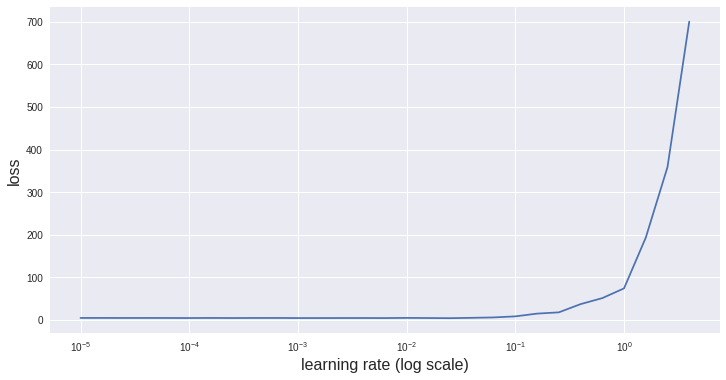

In [38]:
train_conv.lr_find(steps=30)

  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 0/2
----------


  0%|          | 0/32 [00:00<?, ?it/s]

train Loss: 2.9847 Acc: 0.3872


  0%|          | 0/128 [00:00<?, ?it/s]

val Loss: 1.6166 Acc: 0.6084

Epoch 1/2
----------


  0%|          | 0/32 [00:00<?, ?it/s]

train Loss: 2.0444 Acc: 0.5452


  0%|          | 0/128 [00:00<?, ?it/s]

val Loss: 1.4957 Acc: 0.6423

Epoch 2/2
----------


  0%|          | 0/32 [00:00<?, ?it/s]

train Loss: 1.8947 Acc: 0.5803


100%|██████████| 32/32 [00:24<00:00,  1.30it/s]


val Loss: 1.4474 Acc: 0.6703

Training complete in 5m 55s
Best val Acc: 0.670265


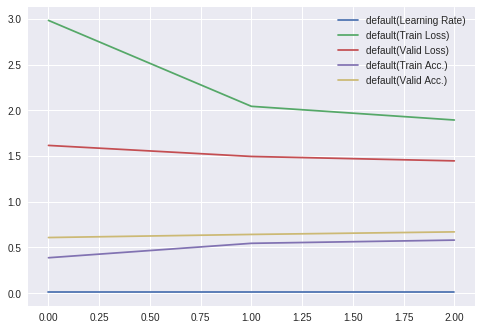

In [39]:
train_conv.train_model(num_epochs=3)

  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 0/2
----------


  0%|          | 0/32 [00:00<?, ?it/s]

train Loss: 1.9135 Acc: 0.5888


  0%|          | 0/128 [00:00<?, ?it/s]

val Loss: 1.3280 Acc: 0.7007

Epoch 1/2
----------


  0%|          | 0/32 [00:00<?, ?it/s]

train Loss: 1.9363 Acc: 0.6020


  0%|          | 0/128 [00:00<?, ?it/s]

val Loss: 1.4651 Acc: 0.6987

Epoch 2/2
----------


  0%|          | 0/32 [00:00<?, ?it/s]

train Loss: 1.8590 Acc: 0.6287


100%|██████████| 32/32 [00:24<00:00,  1.30it/s]


val Loss: 1.6107 Acc: 0.6879

Training complete in 5m 56s
Best val Acc: 0.700687


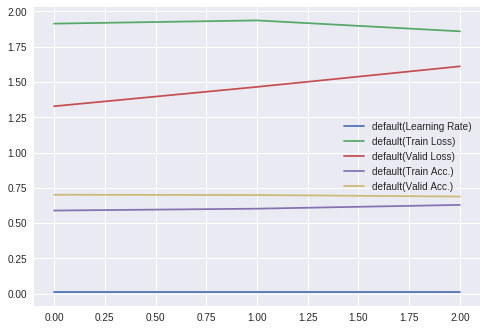

In [40]:
train_conv.train_model(num_epochs=3)

  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 0/2
----------


  0%|          | 0/32 [00:00<?, ?it/s]

train Loss: 1.8594 Acc: 0.6119


  0%|          | 0/128 [00:00<?, ?it/s]

val Loss: 1.4268 Acc: 0.7085

Epoch 1/2
----------


  0%|          | 0/32 [00:00<?, ?it/s]

train Loss: 1.8234 Acc: 0.6281


  0%|          | 0/128 [00:00<?, ?it/s]

val Loss: 1.4973 Acc: 0.6973

Epoch 2/2
----------


  0%|          | 0/32 [00:00<?, ?it/s]

train Loss: 1.8465 Acc: 0.6266


100%|██████████| 32/32 [00:24<00:00,  1.30it/s]


val Loss: 1.5260 Acc: 0.6919

Training complete in 5m 56s
Best val Acc: 0.708538


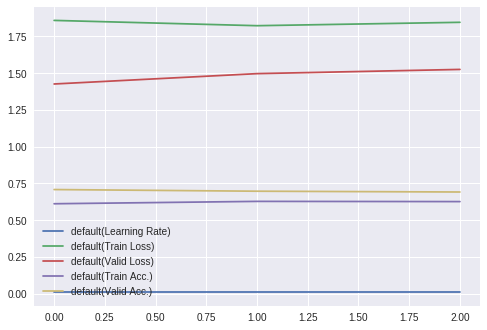

In [41]:
train_conv.train_model(num_epochs=3)

  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 0/5
----------


  0%|          | 0/32 [00:00<?, ?it/s]

train Loss: 1.4652 Acc: 0.6636


  0%|          | 0/128 [00:00<?, ?it/s]

val Loss: 1.1416 Acc: 0.7355

Epoch 1/5
----------


  0%|          | 0/32 [00:00<?, ?it/s]

train Loss: 1.3611 Acc: 0.6796


  0%|          | 0/128 [00:00<?, ?it/s]

val Loss: 1.2095 Acc: 0.7247

Epoch 2/5
----------


  0%|          | 0/32 [00:00<?, ?it/s]

train Loss: 1.3063 Acc: 0.6992


  0%|          | 0/128 [00:00<?, ?it/s]

val Loss: 1.3021 Acc: 0.7134

Epoch 3/5
----------


  0%|          | 0/32 [00:00<?, ?it/s]

train Loss: 1.3353 Acc: 0.6913


  0%|          | 0/128 [00:00<?, ?it/s]

val Loss: 1.1126 Acc: 0.7419

Epoch 4/5
----------


  0%|          | 0/32 [00:00<?, ?it/s]

train Loss: 1.3041 Acc: 0.6917


  0%|          | 0/128 [00:00<?, ?it/s]

val Loss: 1.1786 Acc: 0.7370

Epoch 5/5
----------


  0%|          | 0/32 [00:00<?, ?it/s]

train Loss: 1.3328 Acc: 0.6872


100%|██████████| 32/32 [00:24<00:00,  1.31it/s]


val Loss: 1.1114 Acc: 0.7409

Training complete in 11m 54s
Best val Acc: 0.741904


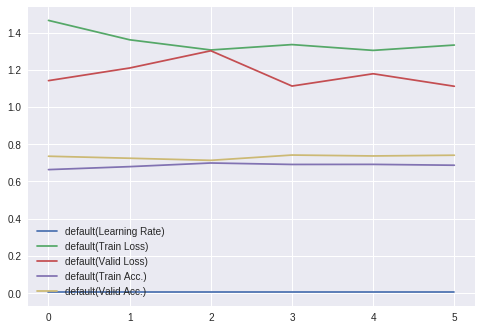

In [42]:
optimizer_conv = optim.Adam(model_conv.base_model.fc.parameters(),lr=0.005,weight_decay=1e-4)
train_conv.train_model(num_epochs=6,optimizer=optimizer_conv)

  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 0/5
----------


  0%|          | 0/32 [00:00<?, ?it/s]

train Loss: 1.0655 Acc: 0.7319


  0%|          | 0/128 [00:00<?, ?it/s]

val Loss: 0.9689 Acc: 0.7738

Epoch 1/5
----------


  0%|          | 0/32 [00:00<?, ?it/s]

train Loss: 0.9819 Acc: 0.7446


  0%|          | 0/128 [00:00<?, ?it/s]

val Loss: 0.9287 Acc: 0.7758

Epoch 2/5
----------


  0%|          | 0/32 [00:00<?, ?it/s]

train Loss: 0.9709 Acc: 0.7533


  0%|          | 0/128 [00:00<?, ?it/s]

val Loss: 0.9289 Acc: 0.7733

Epoch 3/5
----------


  0%|          | 0/32 [00:00<?, ?it/s]

train Loss: 0.9725 Acc: 0.7458


  0%|          | 0/128 [00:00<?, ?it/s]

val Loss: 0.8770 Acc: 0.7782

Epoch 4/5
----------


  0%|          | 0/32 [00:00<?, ?it/s]

train Loss: 0.9303 Acc: 0.7598


  0%|          | 0/128 [00:00<?, ?it/s]

val Loss: 0.8809 Acc: 0.7831

Epoch 5/5
----------


  0%|          | 0/32 [00:00<?, ?it/s]

train Loss: 0.9438 Acc: 0.7509


100%|██████████| 32/32 [00:24<00:00,  1.30it/s]


val Loss: 0.8976 Acc: 0.7733

Training complete in 11m 51s
Best val Acc: 0.783121


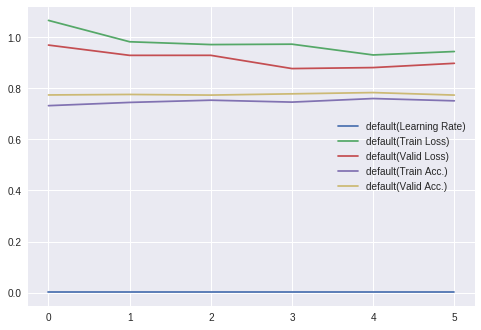

In [43]:
optimizer_conv = optim.Adam(model_conv.base_model.fc.parameters(),lr=0.002,weight_decay=1e-4)
train_conv.train_model(num_epochs=6,optimizer=optimizer_conv)